In [14]:
import pandas as pd
import os

In [28]:
df = pd.read_csv(".\SalesAnalysis\Sales_April_2019_raw.csv")
files = [file for file in os.listdir('.\SalesAnalysis')] # to include a list of files

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/'+file) # to concat all the files in one single file
    all_months_data = pd.concat([all_months_data, df]) # concat the all_months_data to df

all_months_data.to_csv('all_data.csv',index = False)#to change name of the file


In [29]:
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [25]:
all_data = pd.read_csv("all_data.csv") # a new file is created which consisit of all the files(all years)


In [32]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04


In [31]:
all_data['Month'] = all_data['Order Date'].str[0:2] # strip till first 2 characters/numbers

In [37]:
nan_df = all_data[all_data.isna().any(axis = 1)] # to find rows with na values
all_data = all_data.dropna(how = 'any') # to dropna

In [38]:
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
all_data.iloc[356]

Order ID                                           176899
Product                          Lightning Charging Cable
Quantity Ordered                                        1
Price Each                                          14.95
Order Date                                 04/05/19 18:17
Purchase Address    269 South St, San Francisco, CA 94016
Month                                                  04
Name: 358, dtype: object

In [46]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #To remove the 'Or' word from the column

In [47]:
all_data['Month'] = all_data['Month'].astype('int')

In [48]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

In [49]:
all_data['Price Each'] = all_data['Price Each'].astype('float')

Which Month made the most sales

In [50]:
all_data['Sales'] =all_data['Quantity Ordered'] * all_data['Price Each'] # to multiply 2 columns

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [53]:
results = all_data.groupby('Month').sum() #To find the best month for sales--here Descember #Ask--how did it sum these 3 columns only

In [59]:
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


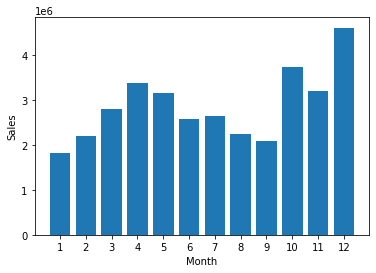

In [60]:
import matplotlib.pyplot as plt
months = range(1,13) # from 1 to 12
plt.bar(x = months, height = results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

##Which city made the most sales

In [75]:
all_data = all_data.drop(columns = 'City')


In [79]:
def get_city(address):
    return address.split(',')[1] # function to split the mentioned column from the first , to next ,
def get_state(address):
    return address.split(',')[2].split(' ')[1] # to split the values from second , and then split by first space after the 2nd ,

#all_data['city'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + '(' + get_state(x) + ')')
all_data['city'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})") #using f function

all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [80]:
results2 = all_data.groupby('city').sum() # to sum all the columns w.r.t other numerical valued columns

In [81]:
results2

,Quantity Ordered,Price Each,Month,Sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


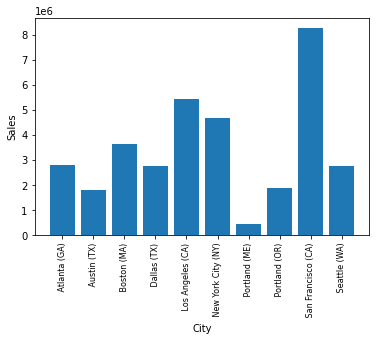

In [91]:
import matplotlib.pyplot as plt

# cities = all_data['city'].unique()
# in the above case the unique function arranges the cities in random order(not in a sequence)
cities = [city for city, df in all_data.groupby('city')]
#using groupby the cities are arranged in a sequence

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8) # for the labels to be in vertical order
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

What time in day most sales had taken place

In [92]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # adjusting the Order Date column acc to datetime feature

In [106]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5


In [97]:
all_data['Hour'] = all_data['Order Date'].dt.hour 
all_data['Minutes'] = all_data['Order Date'].dt.minute
# we can separate the parameters from the column if we adjust it acc to feature DateTime.

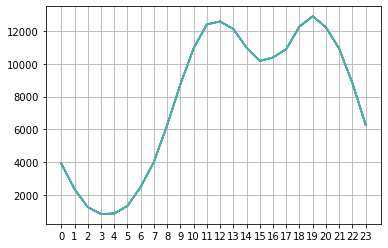

In [105]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
# all_data.groupby(['Hour']).count() # shows the total count of all columns in that hour.
plt.xticks(hours)
plt.grid() # shows grid in the graph
plt.show()


Which products were more often bought together

In [123]:
df = all_data[all_data['Order ID'].duplicated(keep = False)] # by using keep = False we are able to include all the duplicates.

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # a new column 'Grouped' is created which 
# consist of the names of the product with same Order ID--together

df = df[['Order ID','Grouped']].drop_duplicates() # all the duplicates are dropped from Order ID and Grouped columns. 

df.head()


<ipython-input-123-55e0529f7e25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # a new column 'Grouped' is created which


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [121]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [130]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',') # the list of items is which will be bought together are split by ,
    count.update(Counter(combinations(row_list, 2))) # list down the rows with 2 products bought together
    
#print(count)
count.most_common(10)# the 10 most common products which were bought together

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Q 5: What product sold the most? Why do you think it did?

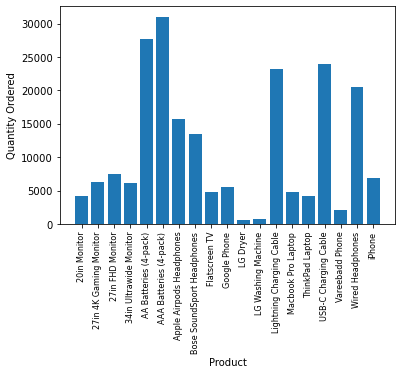

In [134]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

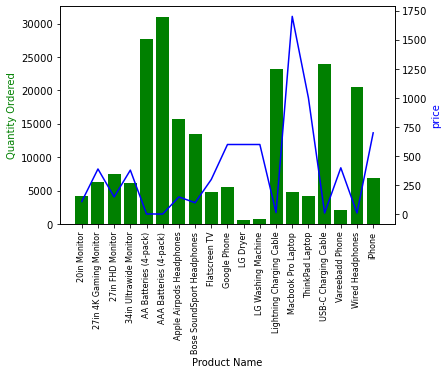

In [148]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('price', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()




